In [232]:
import pandas as pd
import numpy as np

In [233]:
ser=pd.Series([12,23,34,45,56,67,78,89,90])

In [234]:
ser

0    12
1    23
2    34
3    45
4    56
5    67
6    78
7    89
8    90
dtype: int64

In [235]:
ser_reset = ser.reset_index(drop=True)

In [236]:
ser

0    12
1    23
2    34
3    45
4    56
5    67
6    78
7    89
8    90
dtype: int64

In [237]:
dict1={"name":['pranjal','aryan','nimit','priyanshu','harsh','abhishek','meet','ayush'],
                 "marks": [93,34,45,56,67,78,89,90]}

In [238]:
df=pd.DataFrame(dict1)

In [239]:
df

,name,marks
0,pranjal,93
1,aryan,34
2,nimit,45
3,priyanshu,56
4,harsh,67
5,abhishek,78
6,meet,89
7,ayush,90


In [240]:
df_reset=df.reset_index(drop=True)

In [241]:
df

,name,marks
0,pranjal,93
1,aryan,34
2,nimit,45
3,priyanshu,56
4,harsh,67
5,abhishek,78
6,meet,89
7,ayush,90


In [242]:
#iteration-------------------------------------------------------------------------------------------------

In [243]:
for index, marks in df.iterrows():
    print(index , ":" , marks)

0 : name     pranjal
marks         93
Name: 0, dtype: object
1 : name     aryan
marks       34
Name: 1, dtype: object
2 : name     nimit
marks       45
Name: 2, dtype: object
3 : name     priyanshu
marks           56
Name: 3, dtype: object
4 : name     harsh
marks       67
Name: 4, dtype: object
5 : name     abhishek
marks          78
Name: 5, dtype: object
6 : name     meet
marks      89
Name: 6, dtype: object
7 : name     ayush
marks       90
Name: 7, dtype: object


In [244]:
for marks in df.itertuples():
    print(marks)

Pandas(Index=0, name='pranjal', marks=93)
Pandas(Index=1, name='aryan', marks=34)
Pandas(Index=2, name='nimit', marks=45)
Pandas(Index=3, name='priyanshu', marks=56)
Pandas(Index=4, name='harsh', marks=67)
Pandas(Index=5, name='abhishek', marks=78)
Pandas(Index=6, name='meet', marks=89)
Pandas(Index=7, name='ayush', marks=90)


In [245]:
df.marks.apply(np.sqrt)

0    9.643651
1    5.830952
2    6.708204
3    7.483315
4    8.185353
5    8.831761
6    9.433981
7    9.486833
Name: marks, dtype: float64

In [246]:
#multindexing------------------------------------------------------------------------------------------------------

In [247]:
lst = pd.MultiIndex.from_frame(df)

In [248]:
lst

MultiIndex([(  'pranjal', 93),
            (    'aryan', 34),
            (    'nimit', 45),
            ('priyanshu', 56),
            (    'harsh', 67),
            ( 'abhishek', 78),
            (     'meet', 89),
            (    'ayush', 90)],
           names=['name', 'marks'])

In [249]:
lst[4],[2]

(('harsh', np.int64(67)), [2])

In [250]:
df.reindex([3,4,2,1,5,6,7,0])

,name,marks
3,priyanshu,56
4,harsh,67
2,nimit,45
1,aryan,34
5,abhishek,78
6,meet,89
7,ayush,90
0,pranjal,93


In [251]:
#merge------------------------------------------------------------------------------------------------------------

In [252]:
dict2={"name":['pranjal','aryan','nimit','priyanshu','harsh','abhishek','meet','ayush'],
                 "City": ['kanpur','meerut','delhi','agra','agra','sirsa','noida','hisrar']}

In [253]:
df2 = pd.DataFrame(dict2)

In [254]:
newdf = df.merge(df2, on = 'name')

In [255]:
newdf

,name,marks,City
0,pranjal,93,kanpur
1,aryan,34,meerut
2,nimit,45,delhi
3,priyanshu,56,agra
4,harsh,67,agra
5,abhishek,78,sirsa
6,meet,89,noida
7,ayush,90,hisrar


In [256]:
#concat---------------------------------------------------------------------------------------------------------

In [257]:
newdf2=pd.concat([df,df2], axis=1)

In [258]:
newdf2

,name,marks,name,City
0,pranjal,93,pranjal,kanpur
1,aryan,34,aryan,meerut
2,nimit,45,nimit,delhi
3,priyanshu,56,priyanshu,agra
4,harsh,67,harsh,agra
5,abhishek,78,abhishek,sirsa
6,meet,89,meet,noida
7,ayush,90,ayush,hisrar


In [259]:
newdf3=pd.concat([df,df2], axis=0)

In [260]:
newdf3

,name,marks,City
0,pranjal,93.0,NaN
1,aryan,34.0,NaN
2,nimit,45.0,NaN
3,priyanshu,56.0,NaN
4,harsh,67.0,NaN
5,abhishek,78.0,NaN
6,meet,89.0,NaN
7,ayush,90.0,NaN
0,pranjal,NaN,kanpur
1,aryan,NaN,meerut


In [261]:
#newdf["marks"] = newdf["marks"].map({marks>90 : 1, marks<90 : 0})          WRONG

#df["marks"] = df["marks"].map(lambda marks: 1 if marks > 90 else 0)  

In [262]:
df

,name,marks
0,pranjal,93
1,aryan,34
2,nimit,45
3,priyanshu,56
4,harsh,67
5,abhishek,78
6,meet,89
7,ayush,90


In [263]:
newdf3[["name"]].applymap(lambda x: len(x))

C:\Users\dixit\AppData\Local\Temp\ipykernel_34488\2210141671.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  newdf3[["name"]].applymap(lambda x: len(x))


,name
0,7
1,5
2,5
3,9
4,5
5,8
6,4
7,5
0,7
1,5


In [264]:
newdf[["name" , "marks"]].apply(lambda x: len(x), axis=0)


name     8
marks    8
dtype: int64

In [265]:
#series  to  dataframes-----------------------------------------------------------------------------------------

df0 = ser.to_frame()

In [266]:
df0

,0
0,12
1,23
2,34
3,45
4,56
5,67
6,78
7,89
8,90


In [267]:
#laber encoding--------------------------------------------------------------------------------------------------

In [268]:
#df2["city"] = pd.Categorical(df2["City"]).codes

In [269]:
df2

,name,City
0,pranjal,kanpur
1,aryan,meerut
2,nimit,delhi
3,priyanshu,agra
4,harsh,agra
5,abhishek,sirsa
6,meet,noida
7,ayush,hisrar


In [270]:
#one hot encoding--------------------------------------------------------------------------------------------------

In [271]:
#dummy = pd.get_dummies(df2, columns  = ["city"], dtype = int)

In [272]:
dummy

,name,City,city_0,city_1,city_2,city_3,city_4,city_5,city_6
0,pranjal,kanpur,0,0,0,1,0,0,0
1,aryan,meerut,0,0,0,0,1,0,0
2,nimit,delhi,0,1,0,0,0,0,0
3,priyanshu,agra,1,0,0,0,0,0,0
4,harsh,agra,1,0,0,0,0,0,0
5,abhishek,sirsa,0,0,0,0,0,0,1
6,meet,noida,0,0,0,0,0,1,0
7,ayush,hisrar,0,0,1,0,0,0,0


In [ ]:
#statistical functions in pandas-------------------------------------------------------------------------------------

In [273]:
df.marks

0    93
1    34
2    45
3    56
4    67
5    78
6    89
7    90
Name: marks, dtype: int64

In [274]:
df.marks.mean()

np.float64(69.0)

In [275]:
df.marks.median()

np.float64(72.5)

In [276]:
df.marks.mode()

0    34
1    45
2    56
3    67
4    78
5    89
6    90
7    93
Name: marks, dtype: int64

In [277]:
df.marks.std(
)

np.float64(22.271057451320086)

In [278]:
df.marks.var()

np.float64(496.0)

In [282]:
#boolean masking / indexing------------------------------------------------------------------------------------------

In [280]:
df2

,name,City
0,pranjal,kanpur
1,aryan,meerut
2,nimit,delhi
3,priyanshu,agra
4,harsh,agra
5,abhishek,sirsa
6,meet,noida
7,ayush,hisrar


In [283]:
mask = df["name"] == "pranjal"

In [284]:
mask

0     True
1    False
2    False
3    False
4    False
5    False
6    False
7    False
Name: name, dtype: bool

In [ ]:
#  FILL THE MISSING VALLUES---------------------------------------------------------------------------------------
#                                  2 METHODS
#               INTERPOLATE()                          FILLNA()
#-----------------------------------------------------------------------------------------------------------------

In [286]:
ser1 = pd.Series([0,1,2,np.nan,4])
ser1.interpolate()

0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [287]:
ser1.fillna(1)

0    0.0
1    1.0
2    2.0
3    1.0
4    4.0
dtype: float64

In [ ]:
#-------------------------------------------------------------------------------------------------------------------
#              PIVOT()                                                     MELT ()
#          ROWS -> COLUMNS                                              COLUMNS -> ROWS                            
#-------------------------------------------------------------------------------------------------------------------

In [291]:
pivot = df.pivot(index = "marks", columns= "name", values = "name")

In [292]:
pivot

name,abhishek,aryan,ayush,harsh,meet,nimit,pranjal,priyanshu
marks,,,,,,,,
34,NaN,aryan,NaN,NaN,NaN,NaN,NaN,NaN
45,NaN,NaN,NaN,NaN,NaN,nimit,NaN,NaN
56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,priyanshu
67,NaN,NaN,NaN,harsh,NaN,NaN,NaN,NaN
78,abhishek,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN,meet,NaN,NaN,NaN
90,NaN,NaN,ayush,NaN,NaN,NaN,NaN,NaN
93,NaN,NaN,NaN,NaN,NaN,NaN,pranjal,NaN


In [303]:
melt = df.melt(id_vars=["marks"], value_vars=["name"])

In [304]:
melt

,marks,variable,value
0,93,name,pranjal
1,34,name,aryan
2,45,name,nimit
3,56,name,priyanshu
4,67,name,harsh
5,78,name,abhishek
6,89,name,meet
7,90,name,ayush


In [309]:
import matplotlib.pyplot as plt

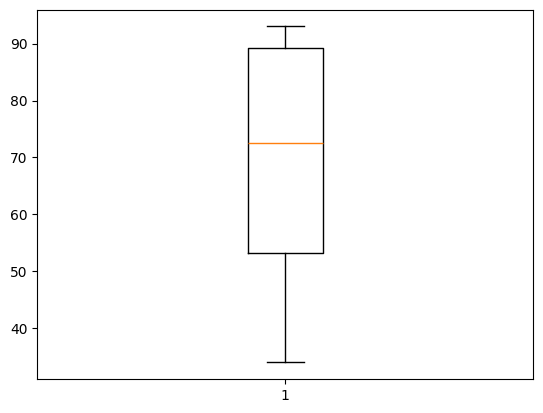

In [310]:
plt.boxplot(df.marks)
plt.show()

In [313]:
df.loc[len(df)] = ["sahid", 54]

In [314]:
df

,name,marks
0,pranjal,93
1,aryan,34
2,nimit,45
3,priyanshu,56
4,harsh,67
5,abhishek,78
6,meet,89
7,ayush,90
8,sahid,54


In [317]:
df._append({"name":"utkarsh", "marks" : 12}, ignore_index = True)

,name,marks
0,pranjal,93
1,aryan,34
2,nimit,45
3,priyanshu,56
4,harsh,67
5,abhishek,78
6,meet,89
7,ayush,90
8,sahid,54
9,utkarsh,12


In [321]:
#---------------------------------------TIMEDELTA--------------------------------------------------------------------

In [318]:
delta = pd.Timedelta('2 days 2 hours 15 minutes 30 seconds')

In [320]:
delta

Timedelta('2 days 02:15:30')